In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Load your dataset
df = pd.read_csv('/Users/lokeshwarans/Downloads/science/crop_production.csv')  # Change the path if needed

# View first few records
print(df.head())
print(df.info())
print(df.isnull().sum())


                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Cr

In [4]:
# Drop rows with null values
df.dropna(inplace=True)

# Remove invalid Area/Production values
df = df[(df['Area'] > 0) & (df['Production'] > 0)]


In [5]:
# Drop rows with null values
df.dropna(inplace=True)

# Remove invalid Area/Production values
df = df[(df['Area'] > 0) & (df['Production'] > 0)]


In [6]:
X = df[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']]
y = df['Production']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
categorical_cols = ['State_Name', 'District_Name', 'Season', 'Crop']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep 'Crop_Year' and 'Area' as they are
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


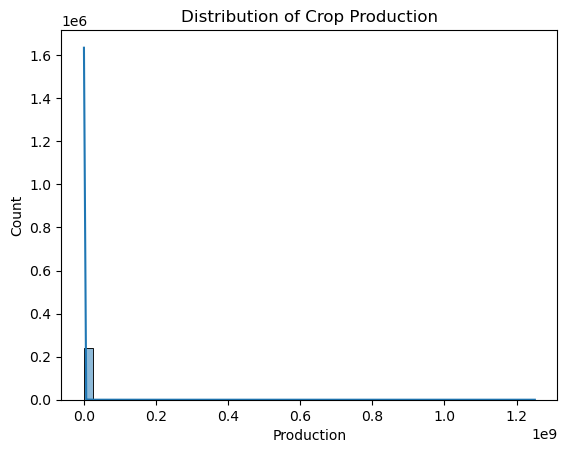

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Production'], bins=50, kde=True)
plt.title("Distribution of Crop Production")
plt.show()

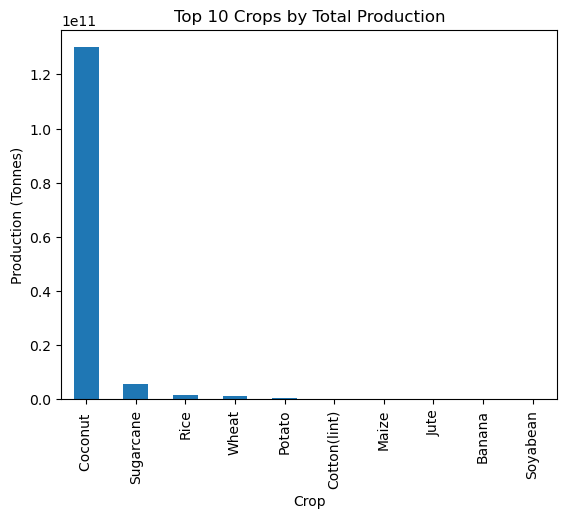

In [11]:
top_crops = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
top_crops.plot(kind='bar', title='Top 10 Crops by Total Production')
plt.ylabel("Production (Tonnes)")
plt.show()

In [9]:
pipeline.fit(x_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State_Name',
                                                   'District_Name', 'Season',
                                                   'Crop'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [12]:
y_pred = pipeline.predict(x_test)

# R2 Score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

R2 Score: 0.9739902483742606
RMSE: 3135133.3355917362


In [13]:
# Example: Predict for custom input
new_input = pd.DataFrame([{
    'State_Name': 'Tamil Nadu',
    'District_Name': 'Coimbatore',
    'Crop_Year': 2023,
    'Season': 'Kharif',
    'Crop': 'Rice',
    'Area': 1  # Try 1, 10, 1500 and observe change
}])

predicted_value = pipeline.predict(new_input)
print(f"Predicted Crop Production (in tonnes): {predicted_value[0]:.2f}")

Predicted Crop Production (in tonnes): 1.82


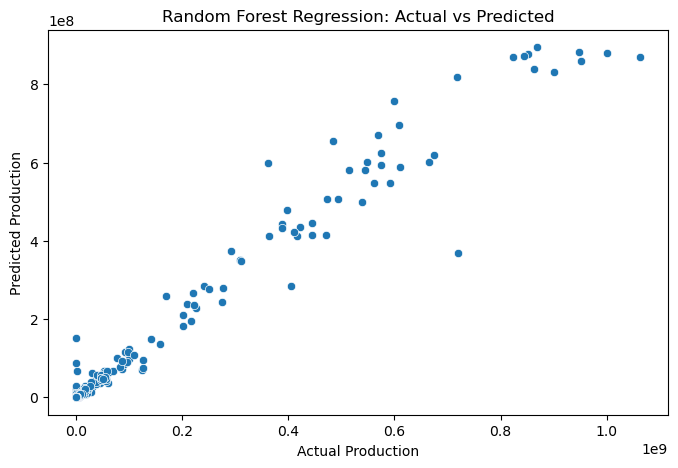

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

In [15]:
import joblib
joblib.dump(pipeline, 'crop_producation_rf_model.pkl')

['crop_producation_rf_model.pkl']

In [16]:
pipeline = joblib.load('crop_producation_rf_model.pkl')

##### model evaluation

In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("🔹 R2 Score:", r2)


🔹 R2 Score: 0.9739902483742606


In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("🔹 RMSE:", rmse)


🔹 RMSE: 3135133.3355917362


In [19]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("🔹 MAE:", mae)


🔹 MAE: 103000.6117093075


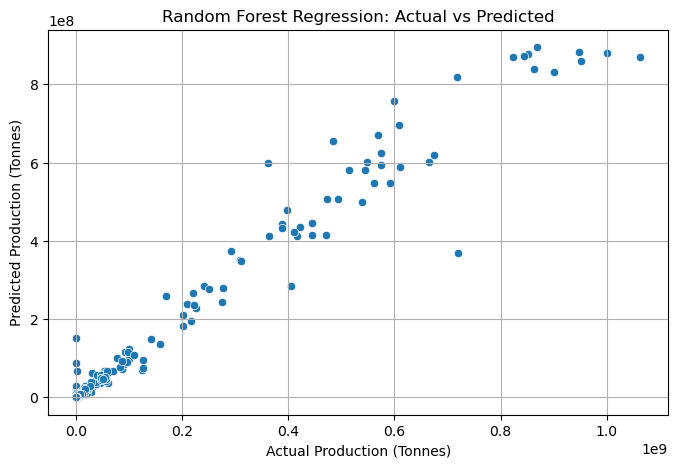

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Production (Tonnes)')
plt.ylabel('Predicted Production (Tonnes)')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.grid(True)
plt.show()


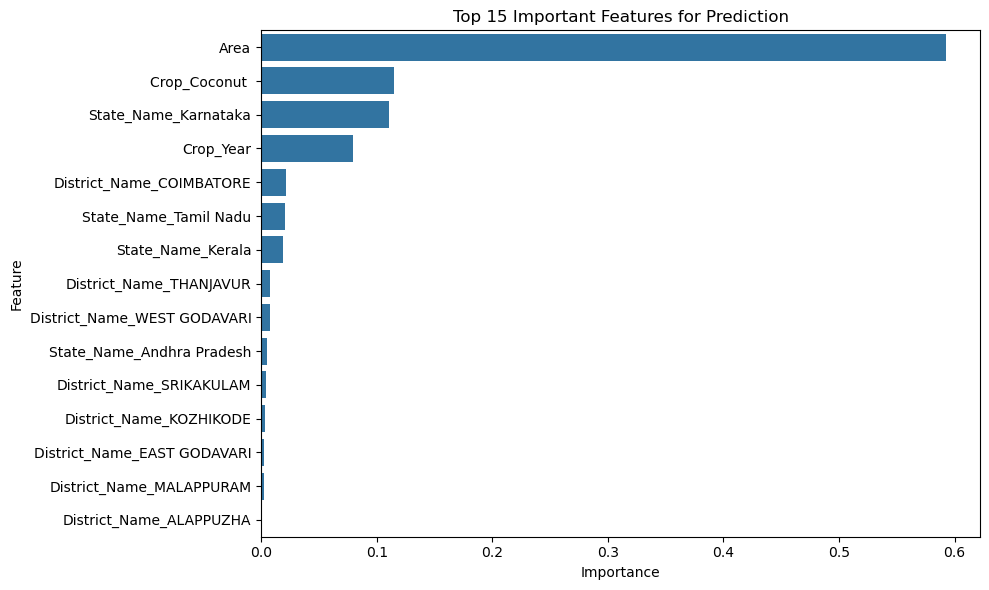

In [23]:
# Extract regressor from pipeline
rf_model = pipeline.named_steps['regressor']
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out(categorical_cols).tolist() + ['Crop_Year', 'Area']

importances = rf_model.feature_importances_

# Combine feature names and importance
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(15))
plt.title('Top 15 Important Features for Prediction')
plt.tight_layout()
plt.show()


##### complete

In [24]:
!streamlit run p_st.py

1792.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8503
  Network URL: http://192.168.1.95:8503

^C


In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.95:8501

2025-04-08 10:19:42.139 Uncaught app exception
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 85, in exec_func_with_error_handling
    result = func()
             ^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/streamlit/runtime/scriptrunner/script_runner.py", line 576, in code_to_exec
    exec(code, module.__dict__)
  File "/Users/lokeshwarans/Downloads/science/app.py", line 77, in <module>
    st.info(get_crop_info(prediction))
            ^^^^^^^^^^^^^
NameError: name 'get_crop_info' is not defined
2025-04-08 10:20:02.885 Uncaught app exception
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 85, in exec_func_with_error_handling
    result = func()
             ^^